In [54]:
import os
import re
import uuid
from collections import Counter
from pathlib import Path

import numpy as np
import pandas as pd
import scanpy as sc
import tifffile
from PIL import Image, ImageOps

In [55]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
%autoreload 2

In [57]:
from violet.utils.preprocessing import get_svs_array, is_background, extract_st_tiles, extract_svs_tiles

In [61]:
out_dir = '/data/violet/sandbox/tcia_pda_run1'
st_raw_dir = os.path.join(out_dir, 'st', 'raw', 'test_A')
st_norm_dir = os.path.join(out_dir, 'st', 'norm')
Path(st_raw_dir).mkdir(parents=True, exist_ok=True)
Path(st_norm_dir).mkdir(parents=True, exist_ok=True)

tcia_raw_dir = os.path.join(out_dir, 'tcia', 'raw', 'test_A')
tcia_norm_dir = os.path.join(out_dir, 'tcia', 'norm')
Path(tcia_raw_dir).mkdir(parents=True, exist_ok=True)
Path(tcia_norm_dir).mkdir(parents=True, exist_ok=True)

In [62]:
# do st
filemap = pd.read_csv('/home/estorrs/spatial-analysis/data/sample_map.txt', sep='\t')
filemap = filemap[~pd.isnull(filemap['highres_image'])]
keep = [d for d in set(filemap['disease'])
        if d=='pdac']
filemap = filemap[[True if d in keep and t == 'ffpe' else False
                  for d, t in zip(filemap['disease'], filemap['tissue_type'])]]
filemap

,sample_id,spaceranger_output,highres_image,disease,tissue_type
62,HT264P1_S1H2Fs1_U1,/data/spatial_transcriptomics/spaceranger_outp...,/data/spatial_transcriptomics/highres_images/p...,pdac,ffpe
63,HT270P1_S1H1Fs5U1,/data/spatial_transcriptomics/spaceranger_outp...,/data/spatial_transcriptomics/highres_images/p...,pdac,ffpe


In [63]:
data_map = {row['sample_id']: {'spatial': row['spaceranger_output'], 'tif': row['highres_image']}
            for i, row in filemap.iterrows()}
regions = [4, 8]
imgs, img_ids = extract_st_tiles(data_map, normalize=False, regions=regions)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(161, 161, 3)


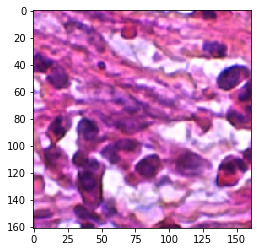

(643, 643, 3)


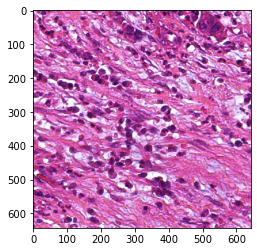

(1287, 1287, 3)


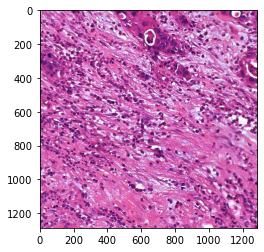

In [64]:
import matplotlib.pyplot as plt
for i in imgs[0]:
    print(i.shape)
    plt.imshow(i)
    plt.show()

In [65]:
for tiles, img_id in zip(imgs, img_ids):
    for i, w in enumerate([1, 4, 8]):
        fname = os.path.join(st_raw_dir, f'{img_id}_{w}.jpeg')
        im = Image.fromarray(tiles[i]).resize((512, 512))
        im.save(fname)

In [77]:
from violet.utils.dataloaders import listfiles
fps = sorted(listfiles('/data/tcia/PDA/', regex='.svs$'))
# fps = [fp for fp in fps if '-21.svs' in fp]
len(fps), fps[:2]

(557, ['/data/tcia/PDA/C3L-00017-21.svs', '/data/tcia/PDA/C3L-00017-22.svs'])

###### tile test

In [69]:
from violet.utils.preprocessing import is_background
out = '/data/violet/sandbox/pix2pix_tiled_test/test_A'
Path(out).mkdir(parents=True, exist_ok=True)
sample = 'C3L-00017-21'
def extract_tiles(img, b=889, target=512):
    rows = int(img.shape[0] // b)
    cols = int(img.shape[1] // b)
    final = np.zeros(img.shape, dtype=np.uint8)
    print(rows, cols)
    tiles = []
    tile_ids = []
    for r in range(rows):
        for c in range(cols):
            print(r, c)
            r_i = (r + 1) * b if r != rows - 1 else img.shape[0] + 1
            c_i = (c + 1) * b if c != cols - 1 else img.shape[1] + 1
            tile = img[r * b:r_i, c * b:c_i]
            im = Image.fromarray(tile).resize((target, target))
            fname = f'{sample}_{r}_{c}.jpeg'
            im.save(os.path.join(out, fname))
    return final
            

In [68]:
img = get_svs_array('/data/tcia/PDA/C3L-00017-21.svs', scale=1.)

In [70]:
extract_tiles(img)

23 22
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
6 20
6 21
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
7 20
7 21
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
8 20
8 21
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 19
9 20

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [72]:
# retile
fps = sorted(listfiles('/data/violet/sandbox/pix2pix_tiled_test/normalized/', regex='.jpeg$'))
len(fps)

504

In [73]:
fp_to_rc = {}
for fp in fps:
    fname = fp.split('/')[-1].split('.')[0]
    r = int(fname.split('_')[-2])
    c = int(fname.split('_')[-1])
    fp_to_rc[fp] = (r, c)

In [74]:
n_rows = max(x for x, _ in fp_to_rc.values()) + 1
n_cols = max(x for _, x in fp_to_rc.values()) + 1
new = np.zeros((n_rows * 512, n_cols * 512, 3)).astype(np.uint8)
for fp in fps:
    r, c = fp_to_rc[fp]
    tile = np.asarray(Image.open(fp))
    new[r * 512:(r+1) * 512, c * 512:(c+1) * 512] = tile
new.shape
    

(11776, 11264, 3)

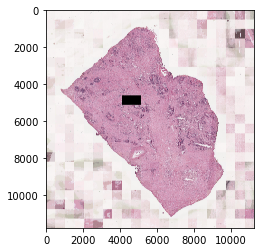

In [75]:
plt.imshow(new)

In [76]:
im = Image.fromarray(new)
im.save('/data/violet/sandbox/pix2pix_tiled_test/slide.jpeg')

###### rest

In [78]:
data_map = {fp.split('/')[-1].split('.')[0]:fp for fp in fps}
len(data_map)

557

In [82]:
import time
time.time()

1637090515.2181613

In [ ]:
start = time.time()
for i, (sample, fp) in enumerate(data_map.items()):
    print(i, sample)
    w = 4
    try:
        imgs, img_ids = extract_svs_tiles({sample:fp}, normalize=False, regions=[w])
        for tiles, img_id in zip(imgs, img_ids):
            fname = os.path.join(tcia_raw_dir, f'{img_id}_{w}.jpeg')
            im = Image.fromarray(tiles[-1]).resize((512, 512))
            im.save(fname)
    except:
        print(f'{sample} failed')
    print(sample, time.time() - start)
    start = time.time()
        

0 C3L-00017-21
188 179
C3L-00017-21 980.0689878463745
1 C3L-00017-22
171 197
C3L-00017-22 932.3131244182587
2 C3L-00017-23
231 197
C3L-00017-23 1005.1556749343872
3 C3L-00017-24
244 305
C3L-00017-24 1942.72878241539
4 C3L-00017-25
255 215
C3L-00017-25 failed
C3L-00017-25 295.516633272171
5 C3L-00017-26
256 305
C3L-00017-26 1538.2563803195953
6 C3L-00102-21
304 215
C3L-00102-21 1060.0090959072113
7 C3L-00102-22
263 251
C3L-00102-22 1641.1878707408905
8 C3L-00102-26
280 251
C3L-00102-26 failed
C3L-00102-26 354.45987343788147
9 C3L-00189-21
229 681
C3L-00189-21 1977.6241810321808
10 C3L-00189-22
262 843
C3L-00189-22 2798.660121202469
11 C3L-00189-23
195 628
C3L-00189-23 failed
C3L-00189-23 632.9284887313843
12 C3L-00189-24
184 807
C3L-00189-24 1734.75527882576
13 C3L-00277-21
282 251
C3L-00277-21 failed
C3L-00277-21 328.02593970298767
14 C3L-00277-22
279 287
C3L-00277-22 1416.8543226718903
15 C3L-00277-23
304 197
C3L-00277-23 1603.7337691783905
16 C3L-00277-24
158 305
C3L-00277-24 1039.00

C3L-01702-24 failed
C3L-01702-24 2219.2696175575256
140 C3L-01703-26
201 807
C3L-01703-26 1766.8593926429749
141 C3L-01703-27
190 699
C3L-01703-27 1102.906958580017
142 C3L-01703-28
193 789
C3L-01703-28 failed
C3L-01703-28 666.9623217582703
143 C3L-01703-29
214 915
C3L-01703-29 failed
C3L-01703-29 927.3128719329834
144 C3L-01971-21
147 161
C3L-01971-21 396.4421741962433
145 C3L-01971-22
144 107
C3L-01971-22 278.28898310661316
146 C3L-01971-23
133 161
C3L-01971-23 352.82529878616333
147 C3L-01971-24
112 125
C3L-01971-24 249.21829319000244
148 C3L-01971-25
139 143
C3L-01971-25 347.08297419548035
149 C3L-01971-26
104 143
C3L-01971-26 257.7327275276184
150 C3L-02109-21
212 538
C3L-02109-21 1175.7202508449554
151 C3L-02109-22
261 592
C3L-02109-22 1645.175615310669
152 C3L-02109-23
147 574
C3L-02109-23 848.6137964725494
153 C3L-02109-24
261 556
C3L-02109-24 662.2787570953369
154 C3L-02112-21
208 789
C3L-02112-21 failed
C3L-02112-21 704.6679975986481
155 C3L-02112-22
167 717
C3L-02112-22 1014

279 621
C3L-04027-23 failed
C3L-04027-23 904.104658126831
274 C3L-04027-24
276 712
C3L-04027-24 failed
C3L-04027-24 952.4372565746307
275 C3L-04027-25
130 548
C3L-04027-25 944.7297787666321
276 C3L-04027-26
233 731
C3L-04027-26 failed
C3L-04027-26 777.6112842559814
277 C3L-04027-27
270 676
C3L-04027-27 failed
C3L-04027-27 913.3415851593018
278 C3L-04027-28
233 657
C3L-04027-28 2457.127205848694
279 C3L-04072-21
88 161
C3L-04072-21 304.3912441730499
280 C3L-04072-22
139 125
C3L-04072-22 356.582200050354
281 C3L-04080-21
188 143
C3L-04080-21 454.5255913734436
282 C3L-04080-22
174 233
C3L-04080-22 1070.7556238174438
283 C3L-04080-23
148 143
C3L-04080-23 385.67257475852966
284 C3L-04080-24
93 107
C3L-04080-24 285.4737141132355
285 C3L-04473-21
175 323
C3L-04473-21 822.413083076477
286 C3L-04473-22
190 520
C3L-04473-22 1638.0347259044647
287 C3L-04473-23
229 735
C3L-04473-23 2183.091235637665
288 C3L-04473-24
238 646
C3L-04473-24 1952.388035774231
289 C3L-04475-21
201 574
C3L-04475-21 1528.

126 610
C3N-01388-23 failed
C3N-01388-23 332.3165011405945
402 C3N-01389-21
199 646
C3N-01389-21 failed
C3N-01389-21 561.6219246387482
403 C3N-01389-22
178 771
C3N-01389-22 failed
C3N-01389-22 602.5071609020233
404 C3N-01502-21
119 412
C3N-01502-21 453.0298767089844
405 C3N-01502-26
180 520
C3N-01502-26 657.0841236114502
406 C3N-01714-21
188 699
C3N-01714-21 798.2342875003815
407 C3N-01714-22
139 663
C3N-01714-22 474.9000356197357
408 C3N-01715-21
200 538
C3N-01715-21 937.7388529777527
409 C3N-01715-22
139 394
C3N-01715-22 669.5783936977386
410 C3N-01716-23
171 681
C3N-01716-23 failed
C3N-01716-23 516.6016247272491
411 C3N-01719-21
198 717
C3N-01719-21 failed
C3N-01719-21 610.6438457965851
412 C3N-01719-22
284 825
C3N-01719-22 failed
C3N-01719-22 1161.944272518158
413 C3N-01719-24
269 574
C3N-01719-24 failed
C3N-01719-24 1090.4963245391846
414 C3N-01897-21
223 592
C3N-01897-21 635.9857466220856
415 C3N-01897-22
281 305
C3N-01897-22 378.5187027454376
416 C3N-01897-23
331 484
C3N-01897-2

In [50]:
data_map = {'C3L-00017-21': '/data/tcia/PDA/C3L-00017-21.svs'}
imgs, img_ids = extract_svs_tiles(data_map, normalize=False, regions=[4])

In [51]:
len(imgs)

11485

(111, 111, 3)


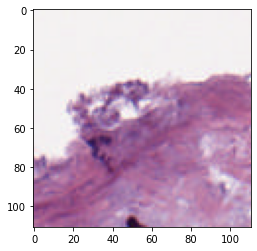

(445, 445, 3)


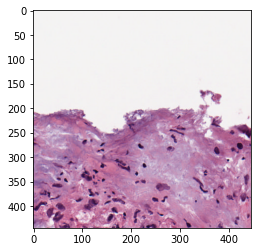

(889, 889, 3)


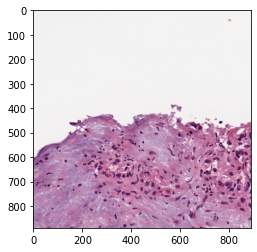

In [52]:
for i in imgs[0]:
    print(i.shape)
    plt.imshow(i)
    plt.show()

In [53]:
for tiles, img_id in zip(imgs, img_ids):
    w = 8
    fname = os.path.join(in_dir, f'{img_id}_{w}.jpeg')
    im = Image.fromarray(tiles[2]).resize((512, 512))
    im.save(fname)
        

In [25]:
# rs = list(regions)
# rs.insert(0, imgs[0][0].shape[0])
# for tiles, img_id in zip(imgs, img_ids):
#     for tile, w in zip(tiles, rs):
#         fname = os.path.join(in_dir, f'{img_id}_{w}.jpeg')
#         im = Image.fromarray(tile).resize((512, 512))
#         im.save(fname)
        

In [22]:
rs = list(regions)
rs.insert(0, imgs[0][0].shape[0])
rs

[161, 512, 1024]